# Activation Functions

This workbook contains.

In [2]:
import tensorflow as tf
import numpy as np

2024-08-05 16:49:25.508196: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-05 16:49:25.775703: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-05 16:49:27.002371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 16:49:31.575821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import warnings

warnings.filterwarnings('ignore')

## 1. Breakdown of Problem Types, Activation and Loss Functions

| Problem Type    | Output Type                        | Final Activation Function  | Loss Function         |
| ---             | ---                                | ---                        | ---                   |
| Regression      | Numerical                          | Linear                     | Mean Squared Error    |
| Classification  | Binary                             | Sigmoid                    | Binary Cross Entropy  |
| Classification  | Single label, multiple classes     | Softmax                    | Cross Entropy         |
| Classification  | Multiple labels, multiple classes  | Sigmoid                    | Binary Cross Entropy  |

## 2. Softmax vs Log Softmax Activation

### 2.1 What is the Softmax Function?

Softmax is an activation function commonly applied as the output of a neural network in multi-class classification tasks. It converts a vector of real numbers into a vector of probabilities.

$$  \sigma(x_i) = \frac {e^x_i} {\sum_k e^xk} $$

![image.png](images/softmax_layer.png)

Create some test logits below.

In [5]:
test_input = np.random.randn(2, 5)
test_input

array([[ 1.02474596,  0.01171102, -0.89638488, -0.85796203,  0.73926283],
       [-0.05313378, -0.77927006,  1.08832295,  0.52705278,  0.60728562]])

Below is the official calculation from tensorflow.

In [43]:
tf.exp(test_input) / tf.reduce_sum(tf.exp(test_input), axis=1, keepdims=True)

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[0.41435577, 0.15045891, 0.06067878, 0.06305561, 0.31145094],
       [0.11994612, 0.05802688, 0.37559047, 0.21426835, 0.23216818]])>

Softmax returns the probability that each input belongs to a certain class.

In [52]:
softmax_output = tf.nn.softmax(test_input)
softmax_output

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[0.41435577, 0.15045891, 0.06067878, 0.06305561, 0.31145094],
       [0.11994612, 0.05802688, 0.37559047, 0.21426835, 0.23216818]])>

Below is the manual calculation.

In [57]:
def softmax_activation(x):
    s = np.max(x, axis=1)
    s = np.expand_dims(s, axis=1)
    e_x = np.exp(x - s)
    div = e_x.sum(axis=1)
    div = np.expand_dims(div, axis=1)
    return e_x / div

In [58]:
softmax_output_manual = softmax_activation(test_input)
softmax_output_manual

array([[0.41435577, 0.15045891, 0.06067878, 0.06305561, 0.31145094],
       [0.11994612, 0.05802688, 0.37559047, 0.21426835, 0.23216818]])

Taking the sum at column level shows that they add up to 1.

In [13]:
np.sum(softmax_output, axis=1)

array([1., 1.])

In [59]:
np.sum(softmax_output_manual, axis=1)

array([1., 1.])

### 2.2 What is the Log Softmax Function and why do we need it?

In [62]:
log_softmax_output = tf.nn.log_softmax(test_input)
log_softmax_output

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[-0.88103033, -1.89406527, -2.80216117, -2.76373832, -1.16651346],
       [-2.12071264, -2.84684892, -0.97925591, -1.54052608, -1.46029324]])>

In [63]:
np.exp(log_softmax_output)

array([[0.41435577, 0.15045891, 0.06067878, 0.06305561, 0.31145094],
       [0.11994612, 0.05802688, 0.37559047, 0.21426835, 0.23216818]])

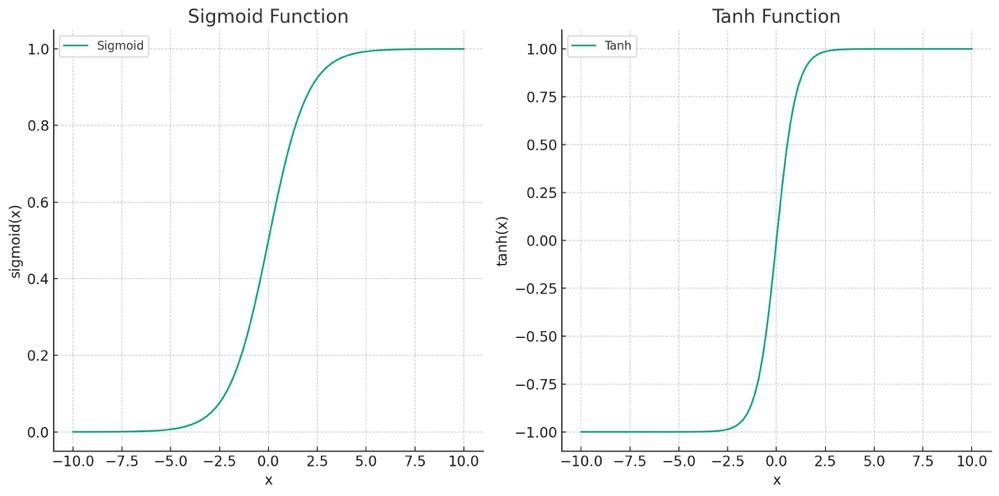

Compared to sigmoid and tanh functions, Softmax can be applied to multi-class classification instead of just binary classification.

The combination of Softmax and negative log likelihood is also known as cross-entropy loss. We can consider the cross entropy loss for a multi-class classification problem as the sum of the negative log likelihood for each individual class.

### 2.3 Advantages and Disdvantages of Log Softmax

### Advantages

- The nature of the logarithm function makes Log Softmax better at handling extreme values in the input data. The log function grows slower than linear or exponential functions. __Therefore, Log Softmax can better handle extreme values in the input data, providing a more balanced and stable output distribution__
- As we mentioned before, we mostly use cross entropy loss with softmax function during training. The cross-entropy loss involves taking the negative log of the probability assigned to the correct class. If we use Log Softmax instead of Softmax, the computation becomes more straightforward and efficient, as the logarithm is already applied in the Softmax step
- When calculating the gradient, the derivative of the Log Softmax function is simpler and more numerically stable than the derivative of the Softmax function. 

### Disadvantages

- __Softmax can be sensitive to outliers or extreme values.__ Since it takes the exponential of input logits, even a slightly higher logit can dominate the probability distribution
- __Softmax tends to be overconfident while computing the probability.__ It usually amplifies the difference between the highest logit and the rest, giving one class a much higher probability and diminishing the others. This can lead to misleading results if the model is, in reality, uncertain
- This overconfidence can also cause issues during back-propagation. __Specifically, when Softmax is used alongside certain loss functions like cross-entropy, it can lead to the vanishing gradients problem.__ This occurs when the probabilities for the correct class are very high, creating very small gradients. As a result, this can slow down the learning process or lead to suboptimal convergence
- __Both Softmax and Log Softmax can be more computationally expensive than simpler activation functions.__ For instance, in binary classification tasks, a basic sigmoid function could be more efficient for training neural networks